In [775]:
from cycle_calculation.gas_turbine_engines import TV7_117
from IPython.display import Latex
from average_streamline_calculation.turbine import Turbine, TurbineType, StageGeomAndHeatDrop, TurbineGeomAndHeatDropDistribution 
import os
import numpy as np
import pickle as pk
%matplotlib inline

In [776]:
def load(filename) -> TV7_117:
    file = open(filename, 'rb')
    result = pk.load(file)
    file.close()
    return result

Загрузка результатов расчета цикла:

In [777]:
my_engine_cycle = load('cycle_calculation\cycle_calculation_results')
my_engine_cycle.power_turbine.output.output_frame.round({'H_turb_stag': -3, 'L_turb': -3, 'T_out_stag': 0, 'c_p_gas': 1, 
                                                        'eta_turb_stag': 4, 'k_gas': 3, 'pi_turb_stag': 3})

,H_turb_stag,L_turb,T_out_stag,c_p_gas,eta_turb_stag,k_gas,pi_turb_stag
0,332000.0,296000.0,845.0,1147.2,0.9172,1.334,3.367


### Задание исходных параметров для расчета турбины

In [778]:
deg = np.pi / 180
power_turbine = Turbine(TurbineType.Power, gamma_in=8 * deg, gamma_out=13.2*deg)

In [779]:
power_turbine.G_turbine = my_engine_cycle.combustion_chamber.output.g_gas[0] * my_engine_cycle.G_air[0]
power_turbine.stage_number = 2
power_turbine.H_t_stag_cycle = my_engine_cycle.power_turbine.output.H_turb_stag[0]
power_turbine.eta_t_stag_cycle = my_engine_cycle.power_turbine.output.eta_turb_stag[0]
power_turbine.n_rel = 0.9
power_turbine.sigma_l = 260e6
power_turbine.p_g_stag = my_engine_cycle.power_turbine.input.p_in_stag[0]
power_turbine.T_g_stag = my_engine_cycle.power_turbine.input.T_in_stag[0]
power_turbine.p_t_stag_cycle = my_engine_cycle.power_turbine.input.p_out_stag[0]
power_turbine.T_t_stag_cycle = my_engine_cycle.power_turbine.output.T_out_stag[0]
power_turbine.alpha_air = my_engine_cycle.combustion_chamber.output.alpha[0]
power_turbine.L_t_cycle = my_engine_cycle.power_turbine.output.L_turb[0]
power_turbine.l1_D1_ratio = 0.285
power_turbine.H01_init = 180e3
power_turbine.c21_init = 200
power_turbine.alpha11 = 16 * deg
power_turbine.rho1 = 0.1

In [780]:
power_turbine.geom[0].delta_a_b_sa_ratio = 7 / 27
power_turbine.geom[0].delta_a_b_rk_ratio = 10 / 15
power_turbine.geom[0].l1_b_sa_ratio = 55 / 27
power_turbine.geom[0].l2_b_rk_ratio = 60 / 15
power_turbine.geom[1].delta_a_b_sa_ratio = 8 / 30
power_turbine.geom[1].delta_a_b_rk_ratio = 11 / 18
power_turbine.geom[1].l1_b_sa_ratio = 80 / 30
power_turbine.geom[1].l2_b_rk_ratio = 93 / 18

### Результаты расчета

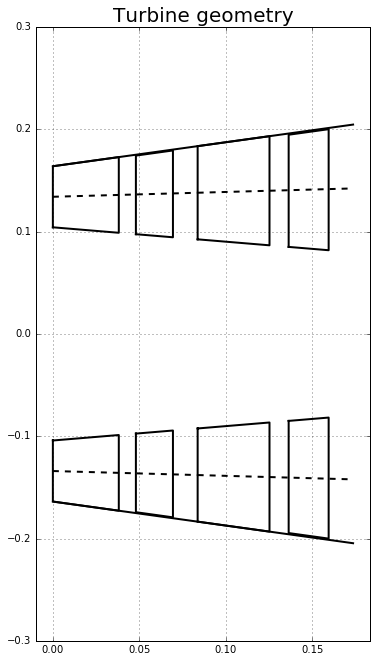

In [781]:
power_turbine.compute_geometry(compute_heat_drop_auto=False)
power_turbine.geom[0].H0 = 180e3
power_turbine.geom[1].H0 = 20e3
power_turbine.geom[0].rho = 0.1
power_turbine.geom[1].rho = 0.1
power_turbine.compute_stages_gas_dynamics()
power_turbine.compute_integrate_turbine_parameters()
st1 = power_turbine[0]
st2 = power_turbine[1]
power_turbine.save()
power_turbine.geom.plot_geometry(figsize=(6, 11))

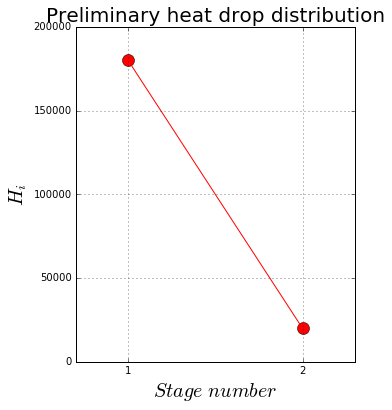

In [782]:
power_turbine.geom.plot_heat_drop_distribution(figsize=(5, 6))

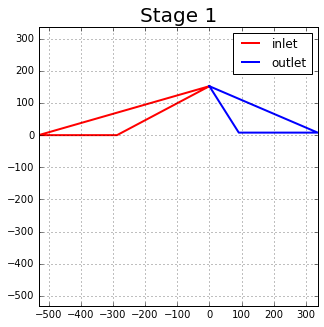

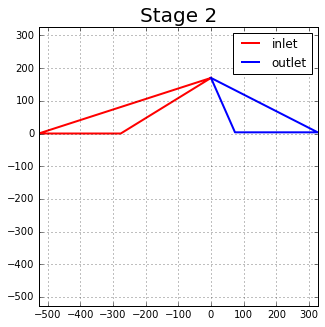

In [783]:
for num, item in enumerate(power_turbine):
    item.plot_velocity_triangle('Stage %s' % (num + 1), figsize=(5, 5))

Работа турбины:

In [784]:
Latex('$L_{t\Sigma}=%s$' % (round(power_turbine.L_t_sum, -3)))

<IPython.core.display.Latex object>

Располагаемый теплоперепад в турбине:

In [785]:
Latex('$H_t=%s$' % (round(power_turbine.H_t, -3)))

<IPython.core.display.Latex object>

Располагаемый теплоперепад по параметрам торможения:

In [786]:
Latex('$H_t^*=%s$' % (round(power_turbine.H_t_stag, -3)))

<IPython.core.display.Latex object>

Мощностной КПД турбины:

In [787]:
Latex('$\eta_t=%s$' % (round(power_turbine.eta_t, 4)))

<IPython.core.display.Latex object>

Лопаточный КПД турбины:

In [788]:
Latex('$\eta_l=%s$' % (round(power_turbine.eta_l, 4)))

<IPython.core.display.Latex object>

КПД турбины по параметрам торможения:

In [789]:
Latex('$\eta_t^*=%s$' % (round(power_turbine.eta_t_stag, 4)))

<IPython.core.display.Latex object>

Мощность турбины:

In [790]:
Latex('$N=%s$' % (round(power_turbine.N, -4)))

<IPython.core.display.Latex object>

In [791]:
Latex(r'$\alpha_{21} = %.2f$' % np.degrees(st1.alpha2))

<IPython.core.display.Latex object>

In [792]:
Latex(r'$\alpha_{22} = %.2f$' % np.degrees(st2.alpha2))

<IPython.core.display.Latex object>

In [793]:
Latex(r'$n=%.2f$' % st2.n)

<IPython.core.display.Latex object>